## 뉴욕 택시 데이터 EDA

In [ ]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

### 라이브러리 설치 및 선언

In [1]:
import chart_studio.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

cf.go_offline()

In [60]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [61]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 1월 전체 택시 운행 수

In [2]:
query = """
SELECT 
    DATETIME_TRUNC(pickup_datetime, hour) as pickup_hour,
    count(*) as cnt
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY pickup_hour
ORDER BY pickup_hour
"""

df = pd.read_gbq(query= query, dialect='standard', project_id='new-york-taxi-309501', auth_local_webserver=True)

Downloading: 100%|████████████████████████████████████████████████████████████████| 744/744 [00:01<00:00, 683.79rows/s]


* 구글 빅쿼리( Google BigGuery )에서 SQL언어를 사용해 데이터를 추출
* 문법은 'Standard'을 사용
* 추출한 데이터를 판다스 데이터프레임으로 만들어주는 함수 ( read_gbq () ) 사용

In [3]:
df.head(10)

,pickup_hour,cnt
0,2015-01-01 00:00:00,28312
1,2015-01-01 01:00:00,31707
2,2015-01-01 02:00:00,28068
3,2015-01-01 03:00:00,24288
4,2015-01-01 04:00:00,17081
5,2015-01-01 05:00:00,9112
6,2015-01-01 06:00:00,6637
7,2015-01-01 07:00:00,6011
8,2015-01-01 08:00:00,5586
9,2015-01-01 09:00:00,6977


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
pickup_hour    744 non-null datetime64[ns]
cnt            744 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [5]:
df = df.set_index('pickup_hour')
df.head(10)

,cnt
pickup_hour,
2015-01-01 00:00:00,28312
2015-01-01 01:00:00,31707
2015-01-01 02:00:00,28068
2015-01-01 03:00:00,24288
2015-01-01 04:00:00,17081
2015-01-01 05:00:00,9112
2015-01-01 06:00:00,6637
2015-01-01 07:00:00,6011
2015-01-01 08:00:00,5586


In [6]:
df.iplot(kind='scatter', xTitle='날짜',yTitle='수요',title='2015년 1월 뉴욕 택시 수요')

* Jan 27에 급격히 건수가 하락
* 미국에서 2015년 1월 23일에 27인치 만큼의 큰 눈폭풍이 발생해서 전체 택시 운행 횟수가 크게 감소  
--> 도메인의 중요성을 깨달았습니다

### 일자별 택시 운행 수

In [7]:
df['date'] = df.index.date
df.groupby(['date'])['cnt'].sum().iplot()

### 시간대, 요일별 택시 운행 수

In [8]:
df.head()

,cnt,date
pickup_hour,,
2015-01-01 00:00:00,28312,2015-01-01
2015-01-01 01:00:00,31707,2015-01-01
2015-01-01 02:00:00,28068,2015-01-01
2015-01-01 03:00:00,24288,2015-01-01
2015-01-01 04:00:00,17081,2015-01-01


In [9]:
df['week'] = df.index.week
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour

In [10]:
df.head()

,cnt,date,week,weekday,hour
pickup_hour,,,,,
2015-01-01 00:00:00,28312,2015-01-01,1,3,0
2015-01-01 01:00:00,31707,2015-01-01,1,3,1
2015-01-01 02:00:00,28068,2015-01-01,1,3,2
2015-01-01 03:00:00,24288,2015-01-01,1,3,3
2015-01-01 04:00:00,17081,2015-01-01,1,3,4


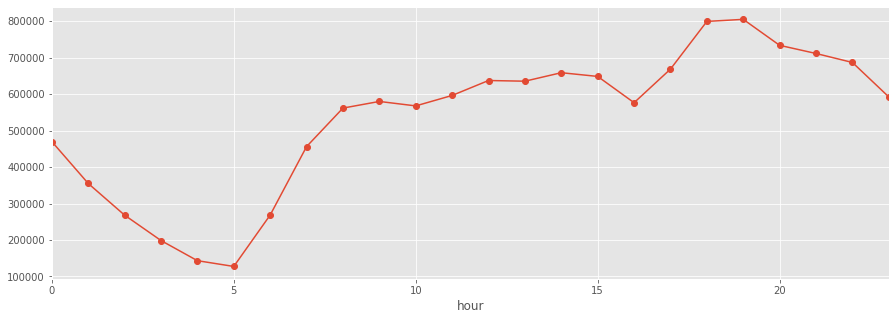

In [11]:
df.groupby(['hour'])['cnt'].sum().plot(figsize=(15,5),kind='line',style='-o')

* 피크타임 : 18 ~ 19시  
* 오프피크타임 : 05시

In [12]:
df.groupby(['hour','weekday'])['cnt'].mean().unstack().iplot(xTitle='시간', yTitle='수요량')

In [13]:
df.groupby(['weekday'])['cnt'].sum().iplot(kind='bar',xTitle='요일',yTitle='수요량')

### 평일/ 주말별 택시 운행 수

In [14]:
pd.DatetimeIndex(df.index)

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               ...
               '2015-01-31 14:00:00', '2015-01-31 15:00:00',
               '2015-01-31 16:00:00', '2015-01-31 17:00:00',
               '2015-01-31 18:00:00', '2015-01-31 19:00:00',
               '2015-01-31 20:00:00', '2015-01-31 21:00:00',
               '2015-01-31 22:00:00', '2015-01-31 23:00:00'],
              dtype='datetime64[ns]', name='pickup_hour', length=744, freq=None)

In [15]:
df['weekend']=(df.index.dayofweek // 5 == 1).astype(int)

In [16]:
df.groupby(['hour','weekend'])['cnt'].mean().unstack().iplot(title="평일과 주말 이용량 차이", xTitle='시간',yTitle='수요량')

* 0 ~ 5시 사이에는 주말( 1 )의 이용량이 평일과 비교시 많은 것으로 나타납니다.  
: ex) 주말에는 밤 늦게까지 약속이 있는 경우  
  
* 5 ~10시 사이에는 평일( 0 )의 이용량이 주말과 비교시 많은 것으로 나타납니다.  
: ex) 오전 출근시간

### 요일별 시간대별 히트맵

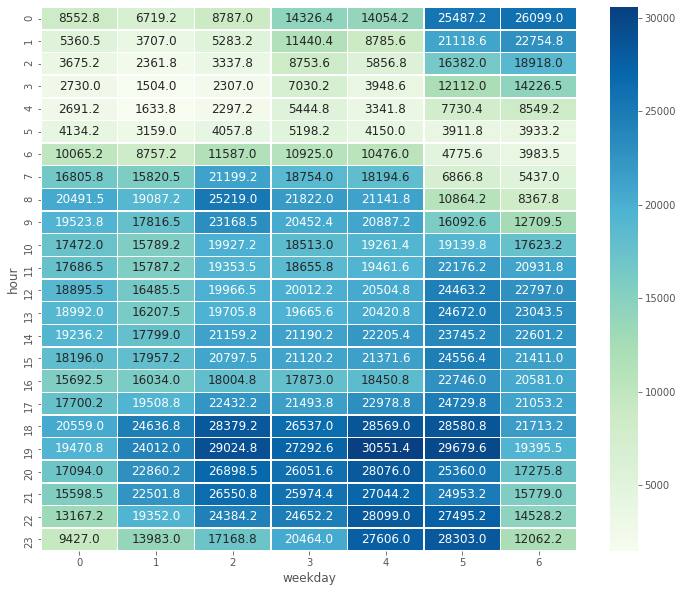

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.groupby(['hour','weekday'])['cnt'].mean().unstack(),
            lw=0.5,annot=True,cmap='GnBu',fmt='.1f', annot_kws={'size':12})

* 평일에는 18 ~ 19시에 택시 운행 수가 증가
* 주말에는 금요일 오후부터 택시 운행 수 증가, 0 ~ 4시까지 운행 수는 평일과 비교 시 상당히 증가 

Text(0.5, 1.0, '< 2015-01 시간대별 택시 이용량 >')

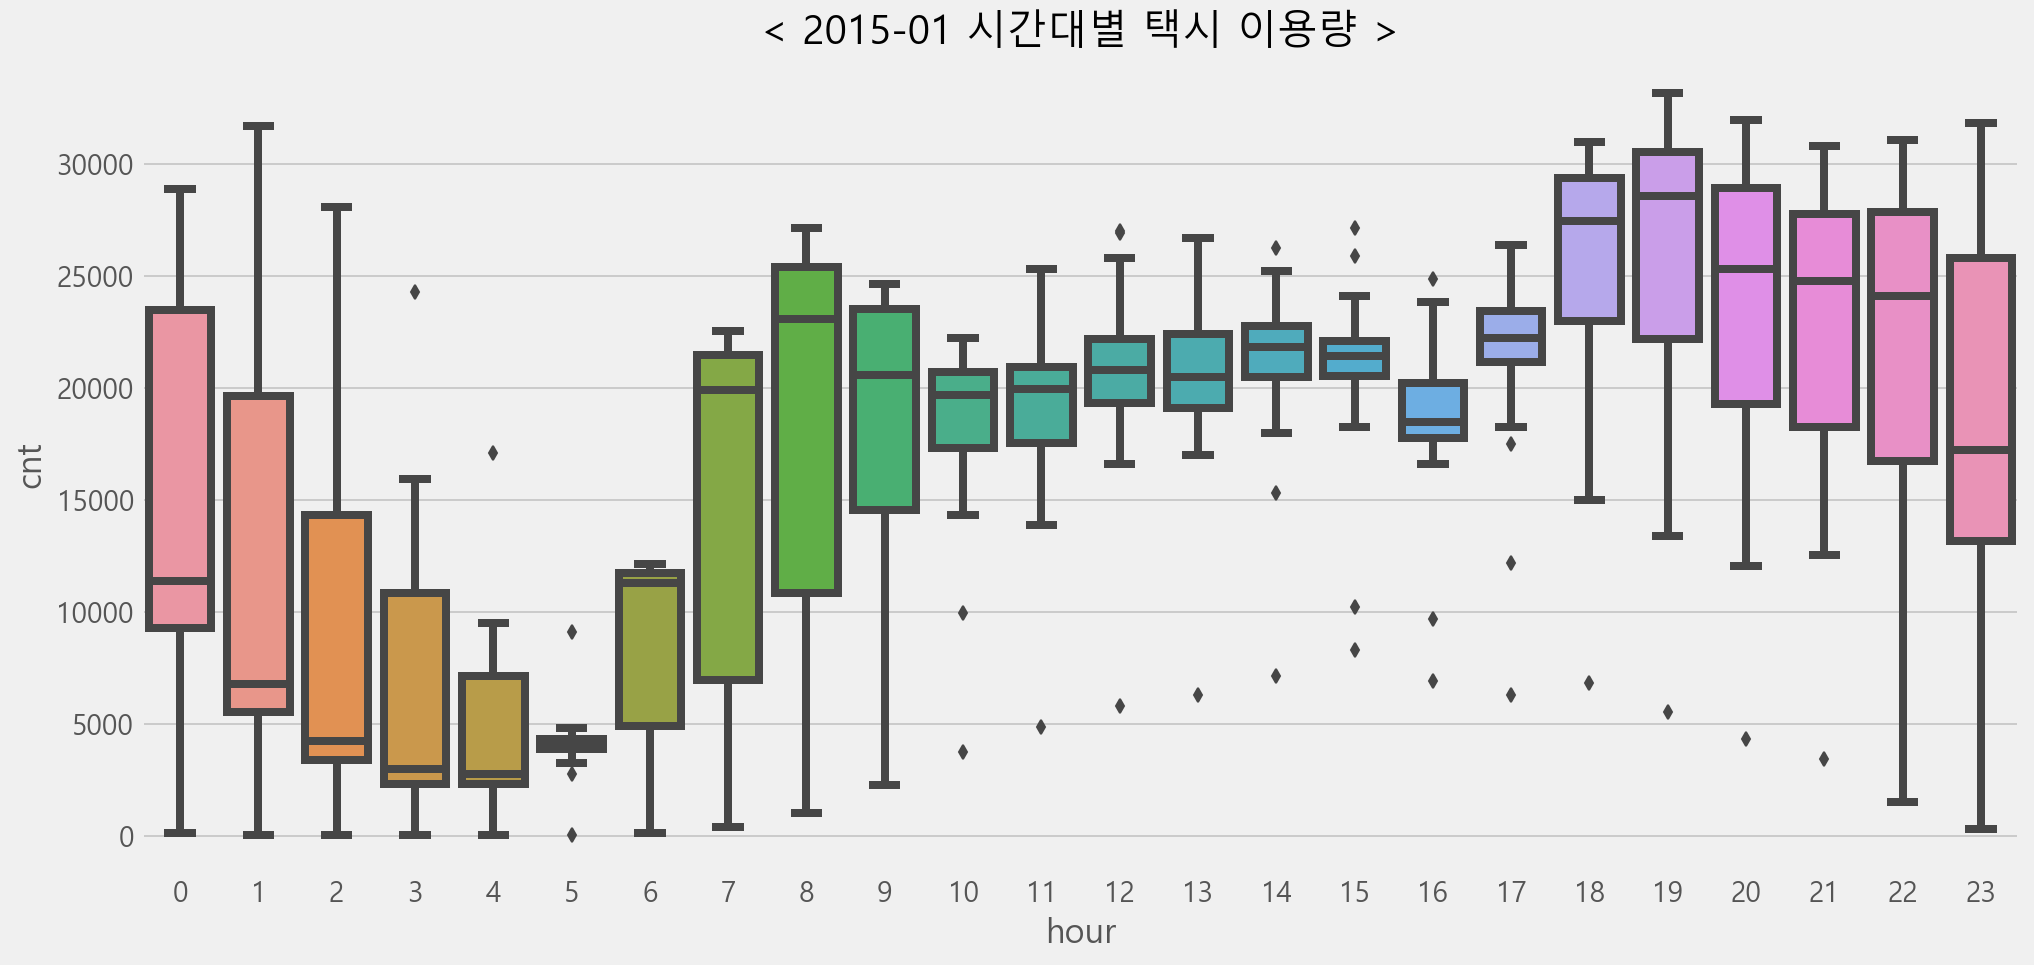

In [62]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='hour', y='cnt')
plt.title('< 2015-01 시간대별 택시 이용량 >')

In [47]:
df

,cnt,date,week,weekday,hour,weekend
pickup_hour,,,,,,
2015-01-01 00:00:00,28312,2015-01-01,1,3,0,0
2015-01-01 01:00:00,31707,2015-01-01,1,3,1,0
2015-01-01 02:00:00,28068,2015-01-01,1,3,2,0
2015-01-01 03:00:00,24288,2015-01-01,1,3,3,0
2015-01-01 04:00:00,17081,2015-01-01,1,3,4,0
...,...,...,...,...,...,...
2015-01-31 19:00:00,32436,2015-01-31,5,5,19,1
2015-01-31 20:00:00,27555,2015-01-31,5,5,20,1
2015-01-31 21:00:00,27477,2015-01-31,5,5,21,1


Text(0.5, 1.0, '< 2015-01월 1주차 택시 이용량 >')

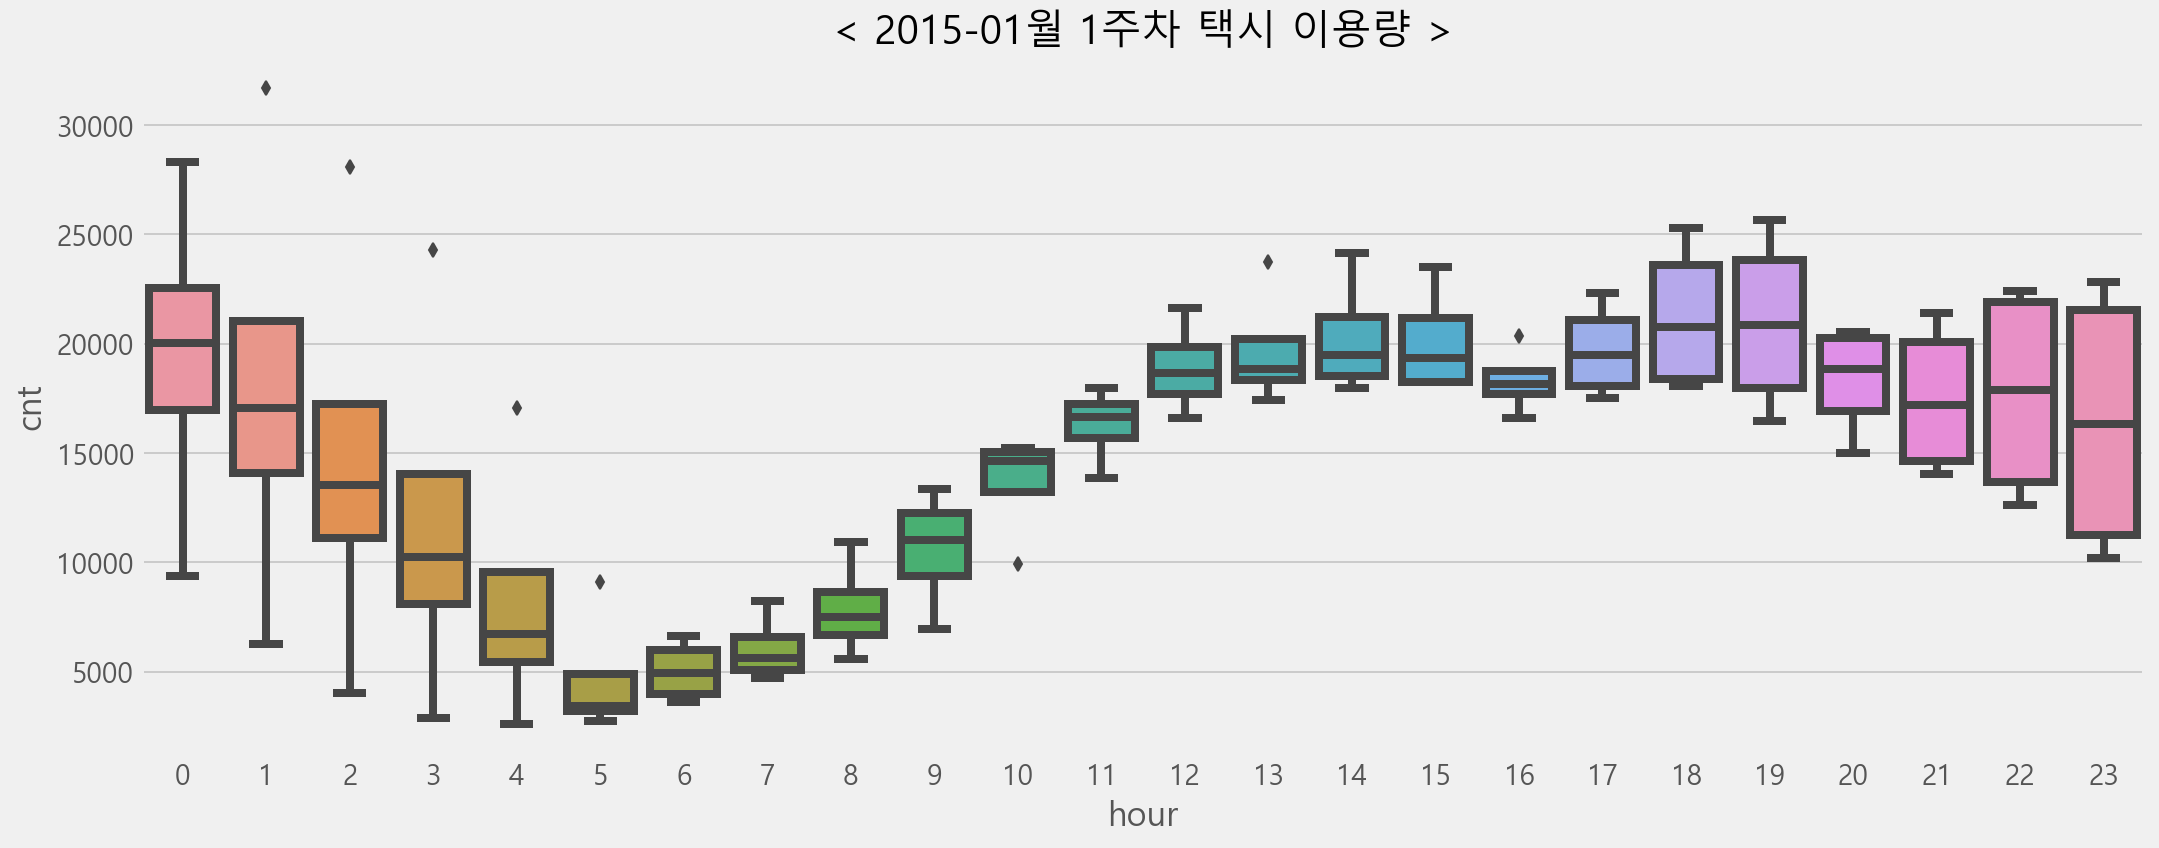

In [63]:
plt.figure(figsize=(16,6))
sns.boxplot(data= df[df['week']==1], x='hour', y='cnt')
plt.title('< 2015-01월 1주차 택시 이용량 >')

In [64]:
def week_boxplot(df, y, week):
    plt.figure(figsize=(16,6))
    sns.boxplot(data= df[df['week']==1], x='hour', y=y)
    plt.title(f'< 2015-{week:02}주차 택시 이용량>')

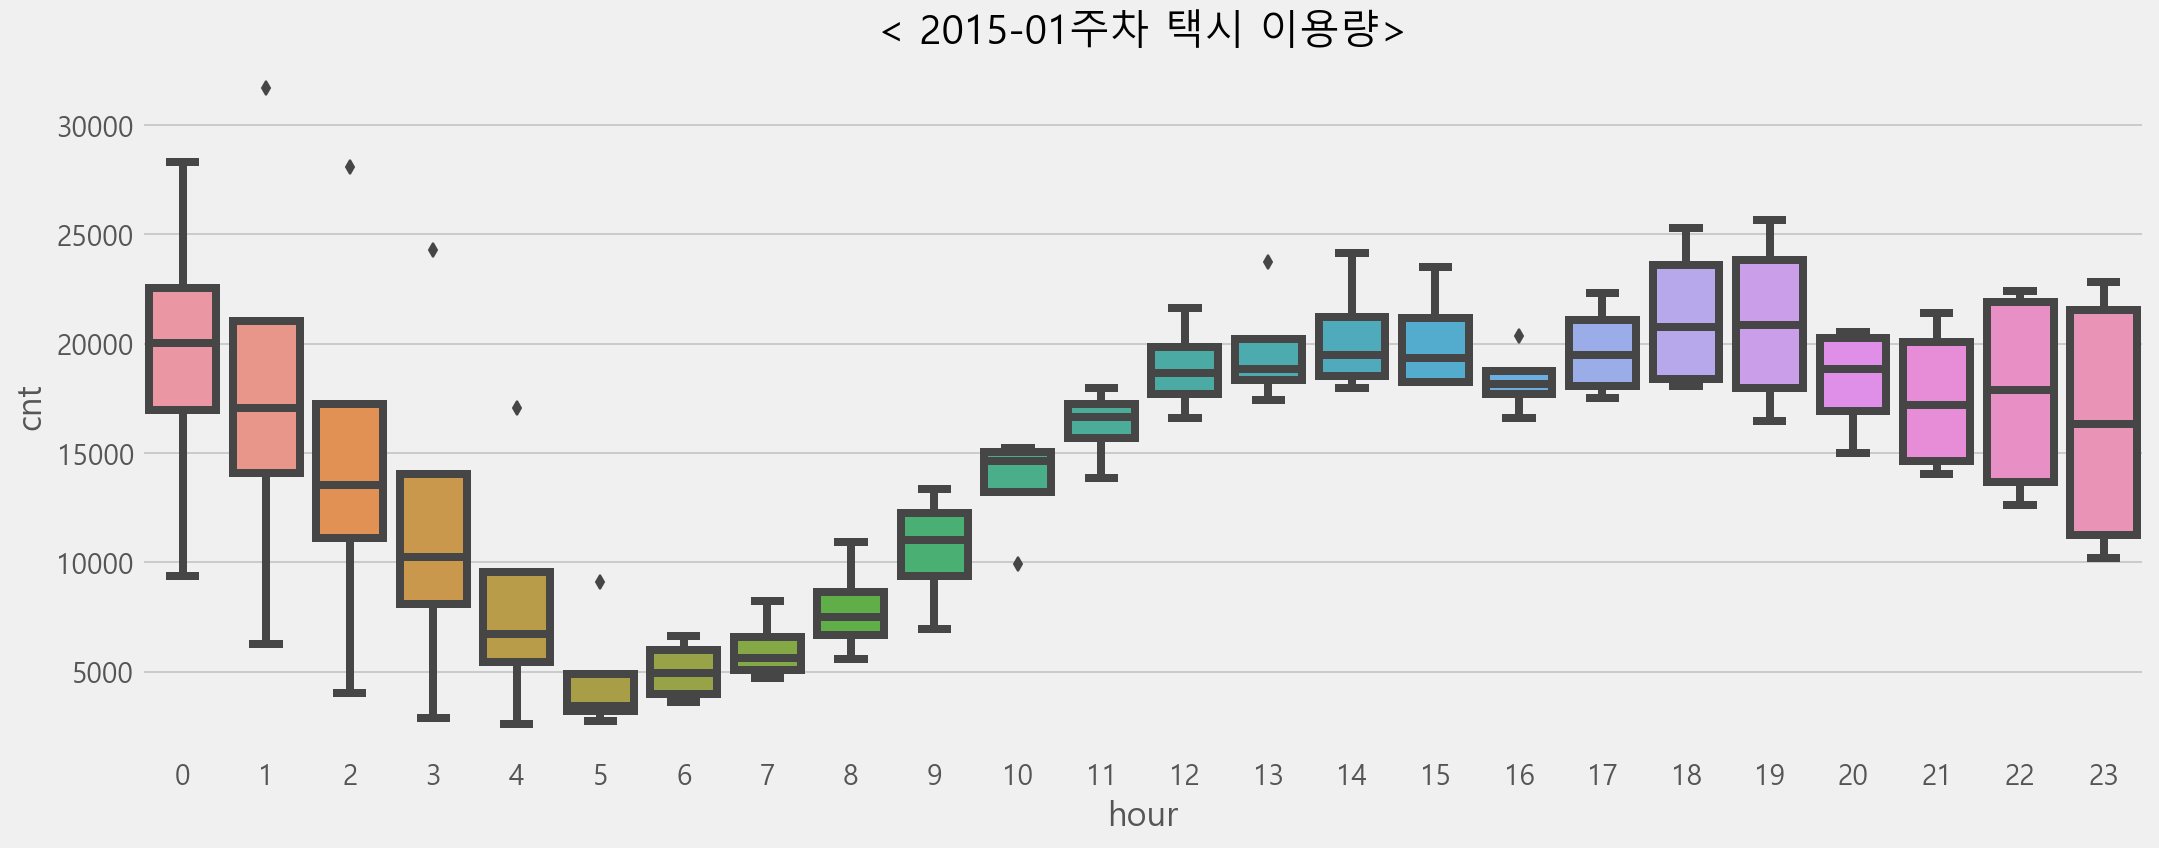

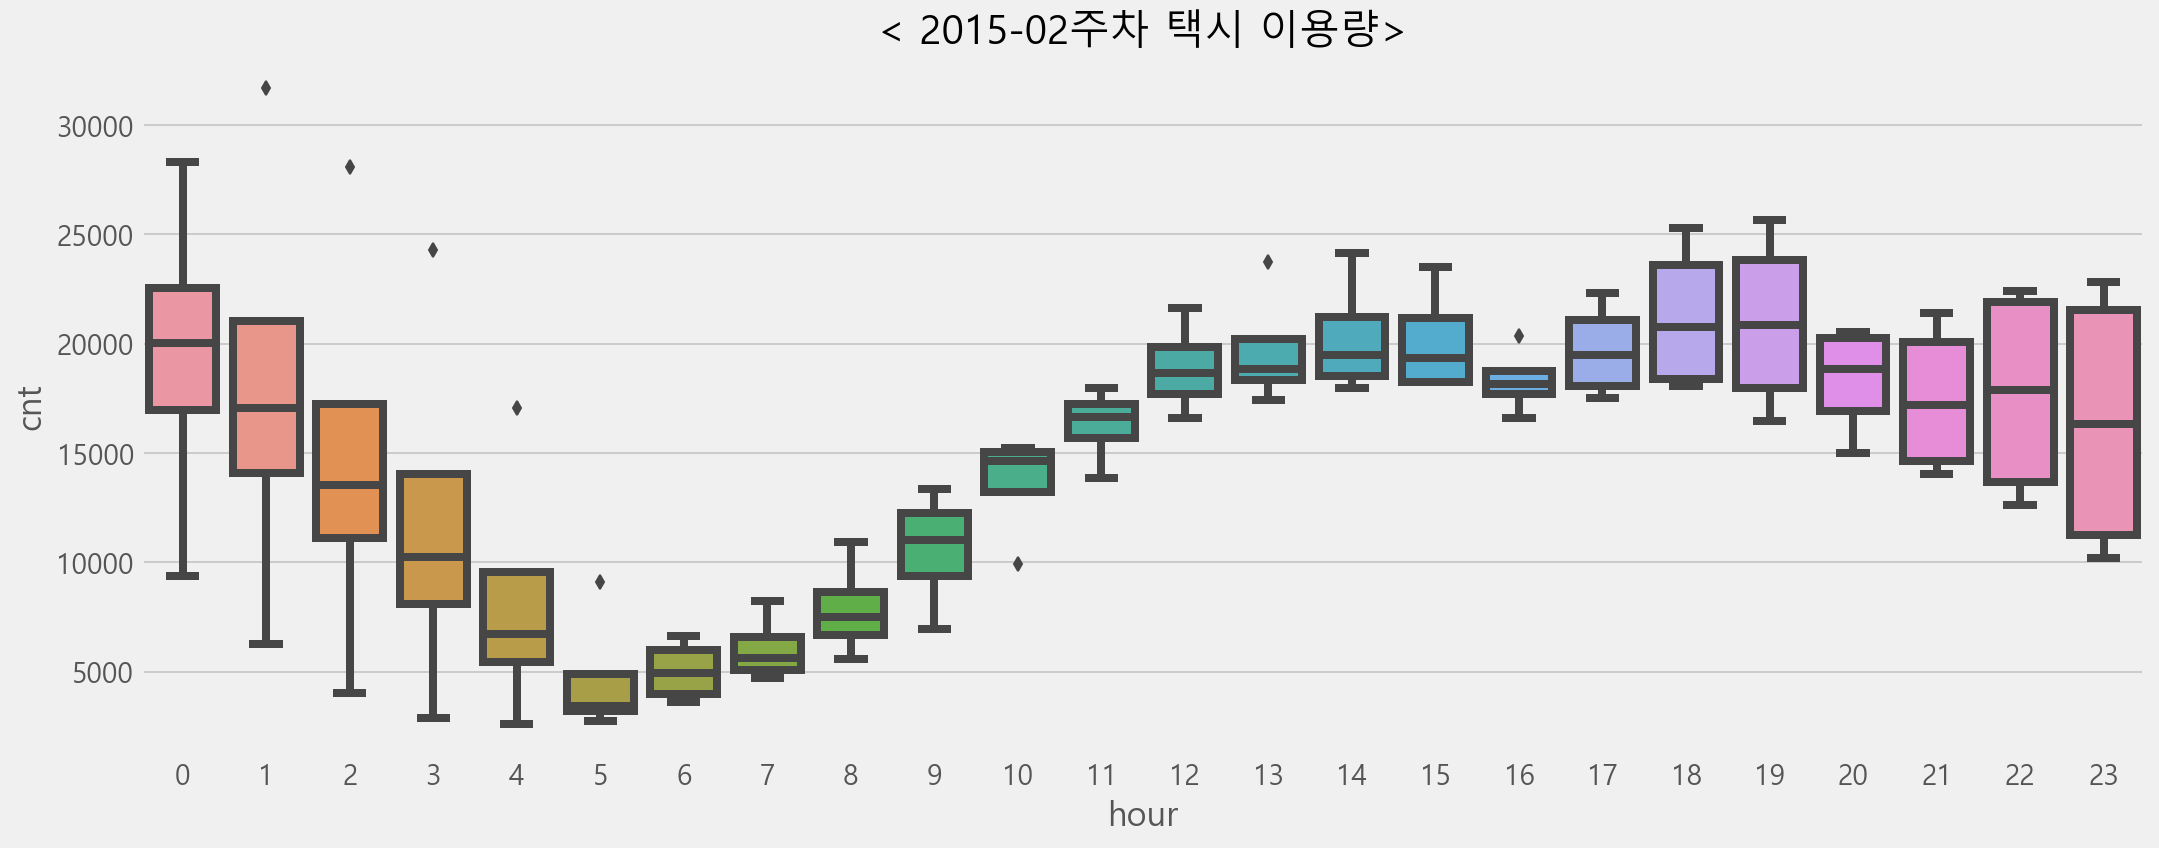

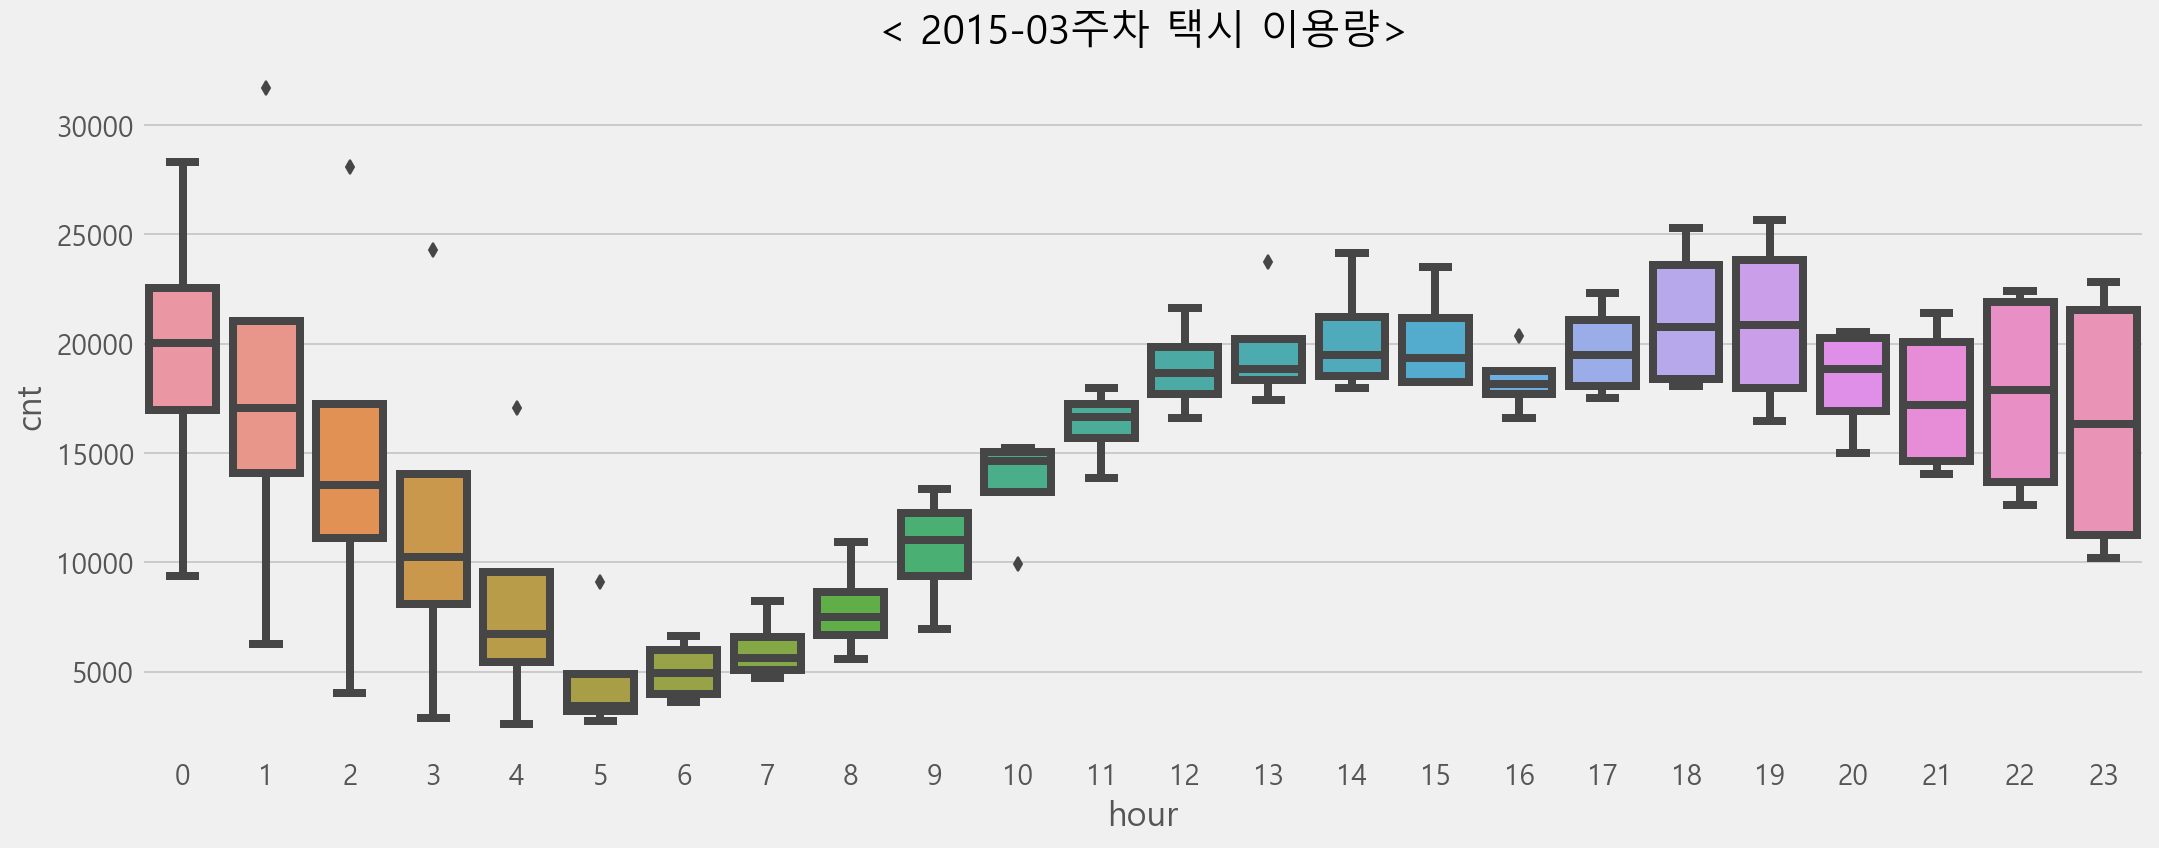

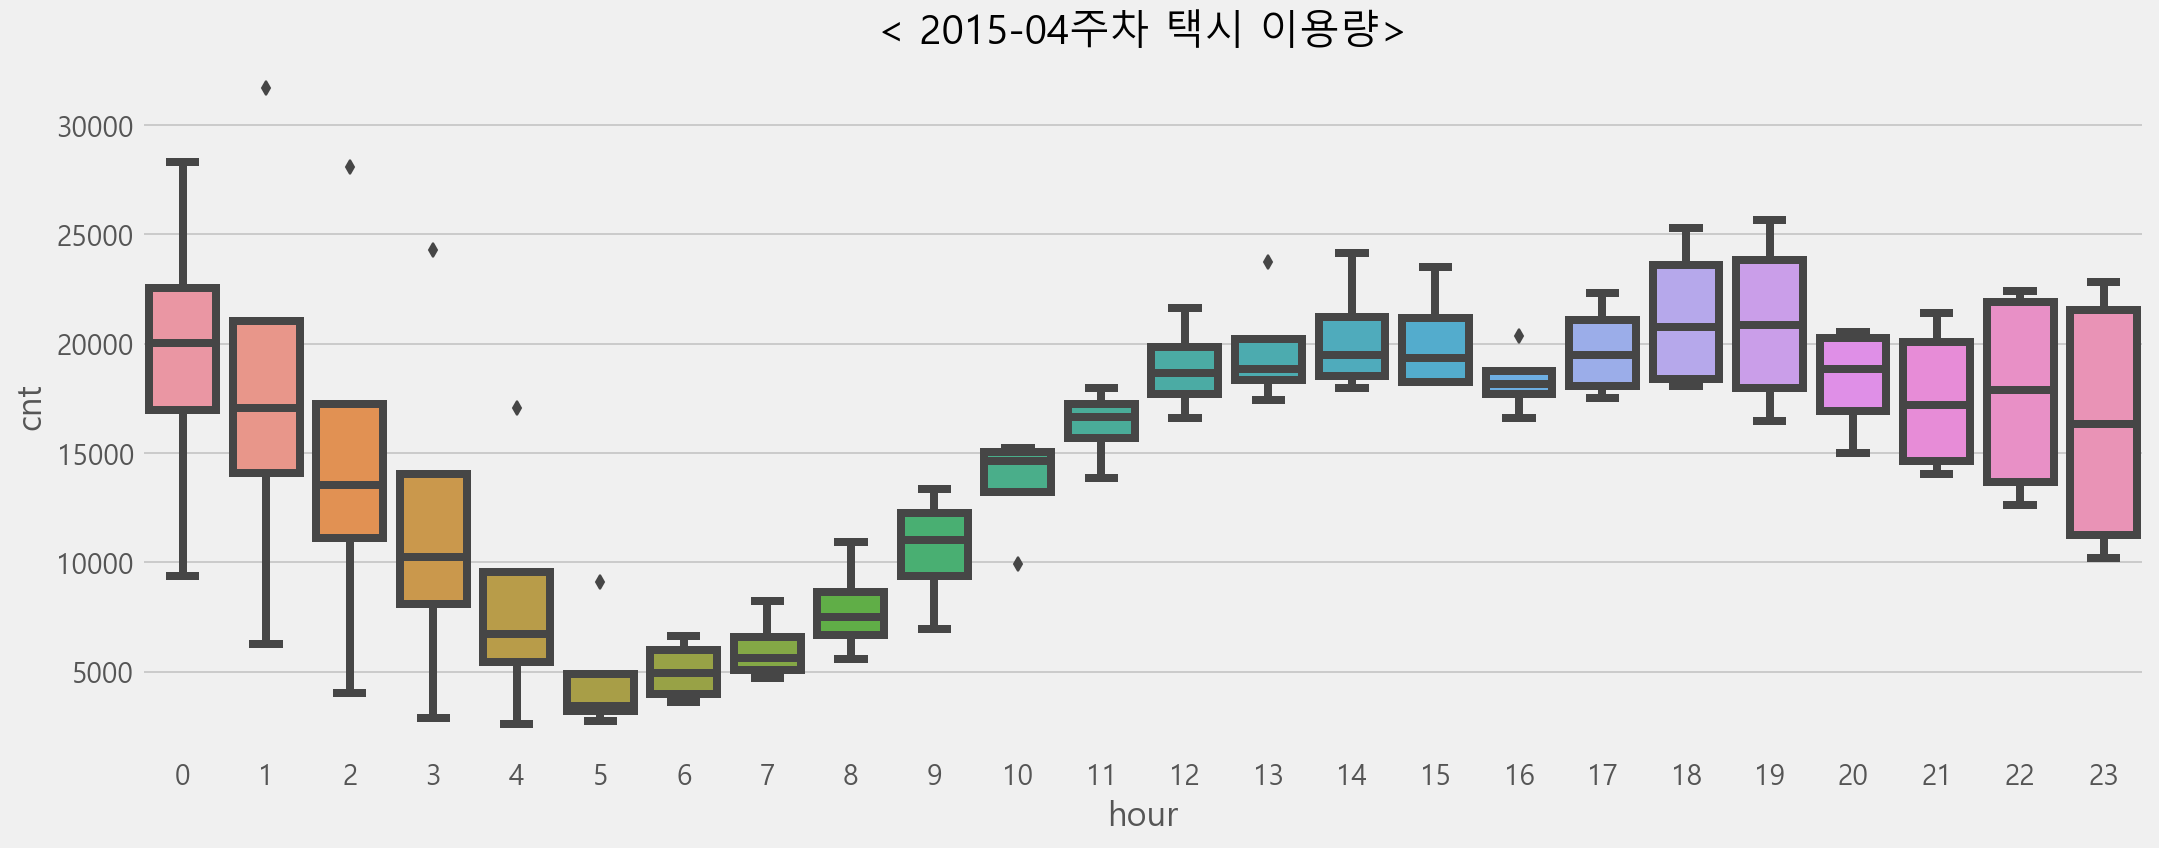

In [65]:
for week in range(1,5):
    week_boxplot(df,'cnt',week)

### 택시 운행 거리 분포

In [67]:
trip_distance_query = """
SELECT 
    floor(trip_distance/30)*30 as bucket_floor,
    count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY bucket_floor
order by bucket_floor
"""


trip_distance_query_log = """
SELECT 
    floor(trip_distance/30)*30 as bucket_floor,
    log10(count(*)) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY bucket_floor
order by bucket_floor
"""

distance_df = pd.read_gbq(query=trip_distance_query, dialect='standard', project_id='new-york-taxi-309501')
distance_log_df = pd.read_gbq(query=trip_distance_query_log, dialect='standard', project_id='new-york-taxi-309501')

Downloading: 100%|███████████████████████████████████████████████████████████████████| 57/57 [00:01<00:00, 53.38rows/s]


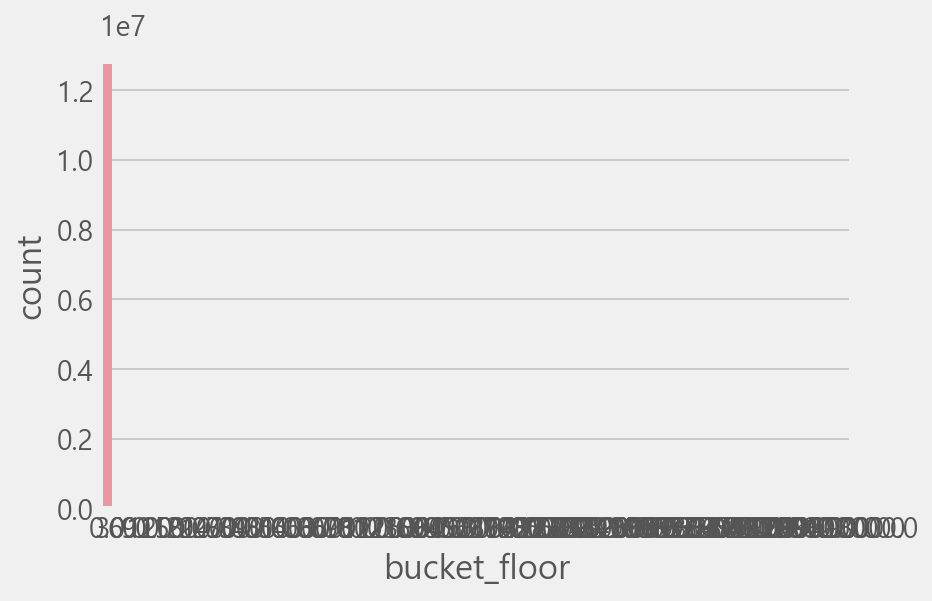

In [68]:
sns.barplot(data = distance_df, x='bucket_floor', y='count')

In [73]:
distance_df.head()

,bucket_floor,count
0,0.0,12745563
1,30.0,3027
2,60.0,120
3,90.0,124
4,120.0,16


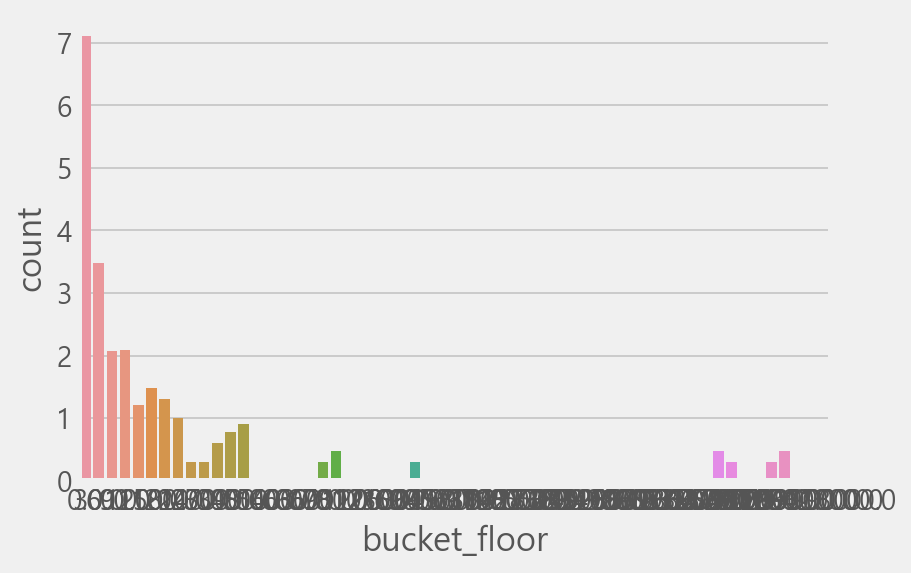

In [72]:
sns.barplot(data = distance_log_df, x='bucket_floor', y='count')

In [74]:
distance_log_df.head()

,bucket_floor,count
0,0.0,7.105359
1,30.0,3.481012
2,60.0,2.079181
3,90.0,2.093422
4,120.0,1.204120


### 장거리/ 단거리 수요

In [75]:
short_trip_query = """
SELECT 
  EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
  EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
  count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance < 30
GROUP BY pickup_hour, dropoff_hour
"""

short_trip_df = pd.read_gbq(query=short_trip_query, dialect='standard', project_id='new-york-taxi-309501')

Downloading: 100%|███████████████████████████████████████████████████████████████| 339/339 [00:00<00:00, 1092.44rows/s]


In [76]:
long_trip_query = """
SELECT 
  EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
  EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
  count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015`
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance >= 30
GROUP BY pickup_hour, dropoff_hour

"""

long_trip_df = pd.read_gbq(query=long_trip_query, dialect='standard', project_id='new-york-taxi-309501')

Downloading: 100%|████████████████████████████████████████████████████████████████| 115/115 [00:01<00:00, 109.70rows/s]


In [77]:
short_trip_df.head()

,pickup_hour,dropoff_hour,count
0,19,19,653731
1,14,14,511868
2,21,21,575352
3,9,9,457809
4,5,6,27610


In [78]:
long_trip_df.head()

,pickup_hour,dropoff_hour,count
0,17,18,132
1,22,23,98
2,19,19,30
3,21,21,37
4,8,9,74


In [86]:
trip_df = short_trip_df.merge(long_trip_df, on=['pickup_hour','dropoff_hour'], suffixes=['_short','_long'])
trip_df = trip_df.rename({'count_short':'short_trip_count','count_long':'long_trip_count'},axis='columns')
trip_df.head()

,pickup_hour,dropoff_hour,short_trip_count,long_trip_count
0,19,19,653731,30
1,14,14,511868,28
2,21,21,575352,37
3,9,9,457809,12
4,5,6,27610,53


In [99]:
trip_df_pickup = trip_df.groupby(["pickup_hour"], as_index=False).agg({'short_trip_count':'sum', 'long_trip_count':'sum'}).sort_values(by="pickup_hour")
trip_df_pickup.head()

,pickup_hour,short_trip_count,long_trip_count
0,0,469713,146
1,1,354890,94
2,2,267918,89
3,3,198414,59
4,4,143109,62


In [106]:
trip_df_drop_off = trip_df.groupby(['dropoff_hour'], as_index=False).agg({'short_trip_count':'sum','long_trip_count':'sum'}).sort_values(by='dropoff_hour')
trip_df_drop_off.head()

,dropoff_hour,short_trip_count,long_trip_count
0,0,494882,149
1,1,377049,147
2,2,284456,100
3,3,208594,81
4,4,156581,57


In [167]:
def clock(ax, radii, title, color):
    N=24
    bottom = 2
    
    theta = np.linspace( 0.0, 2 * np.pi, N, endpoint = False )
    
    width = 2*np.pi / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")
    
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)

In [170]:
def short_long_trip_diff(trip_df_pickup, trip_df_drop_off):
    fig, ax = plt.subplots(2,2,figsize=(18,18))
    
    ax = plt.subplot(2,2,1, polar=True)
    radii = np.array(trip_df_pickup['short_trip_count'].tolist(), dtype="int64")
    title = "단거리 운행 시 탑승 시간"
    clock(ax, radii, title, "red")

    ax = plt.subplot(2,2,2, polar=True)
    radii = np.array(trip_df_drop_off['short_trip_count'].tolist(), dtype="int64")
    title = "단거리 운행 시 하차 시간"
    clock(ax, radii, title, "red")
    
    ax = plt.subplot(2,2,3, polar=True)
    radii = np.array(trip_df_pickup['long_trip_count'].tolist(), dtype="int64")
    title = "장거리 운행 시 탑승 시간"
    clock(ax, radii, title, "skyblue")

    ax = plt.subplot(2,2,4, polar=True)
    radii = np.array(trip_df_drop_off['long_trip_count'].tolist(), dtype="int64")
    title = "장거리 운행 시 하차 시간"
    clock(ax, radii, title, "skyblue")

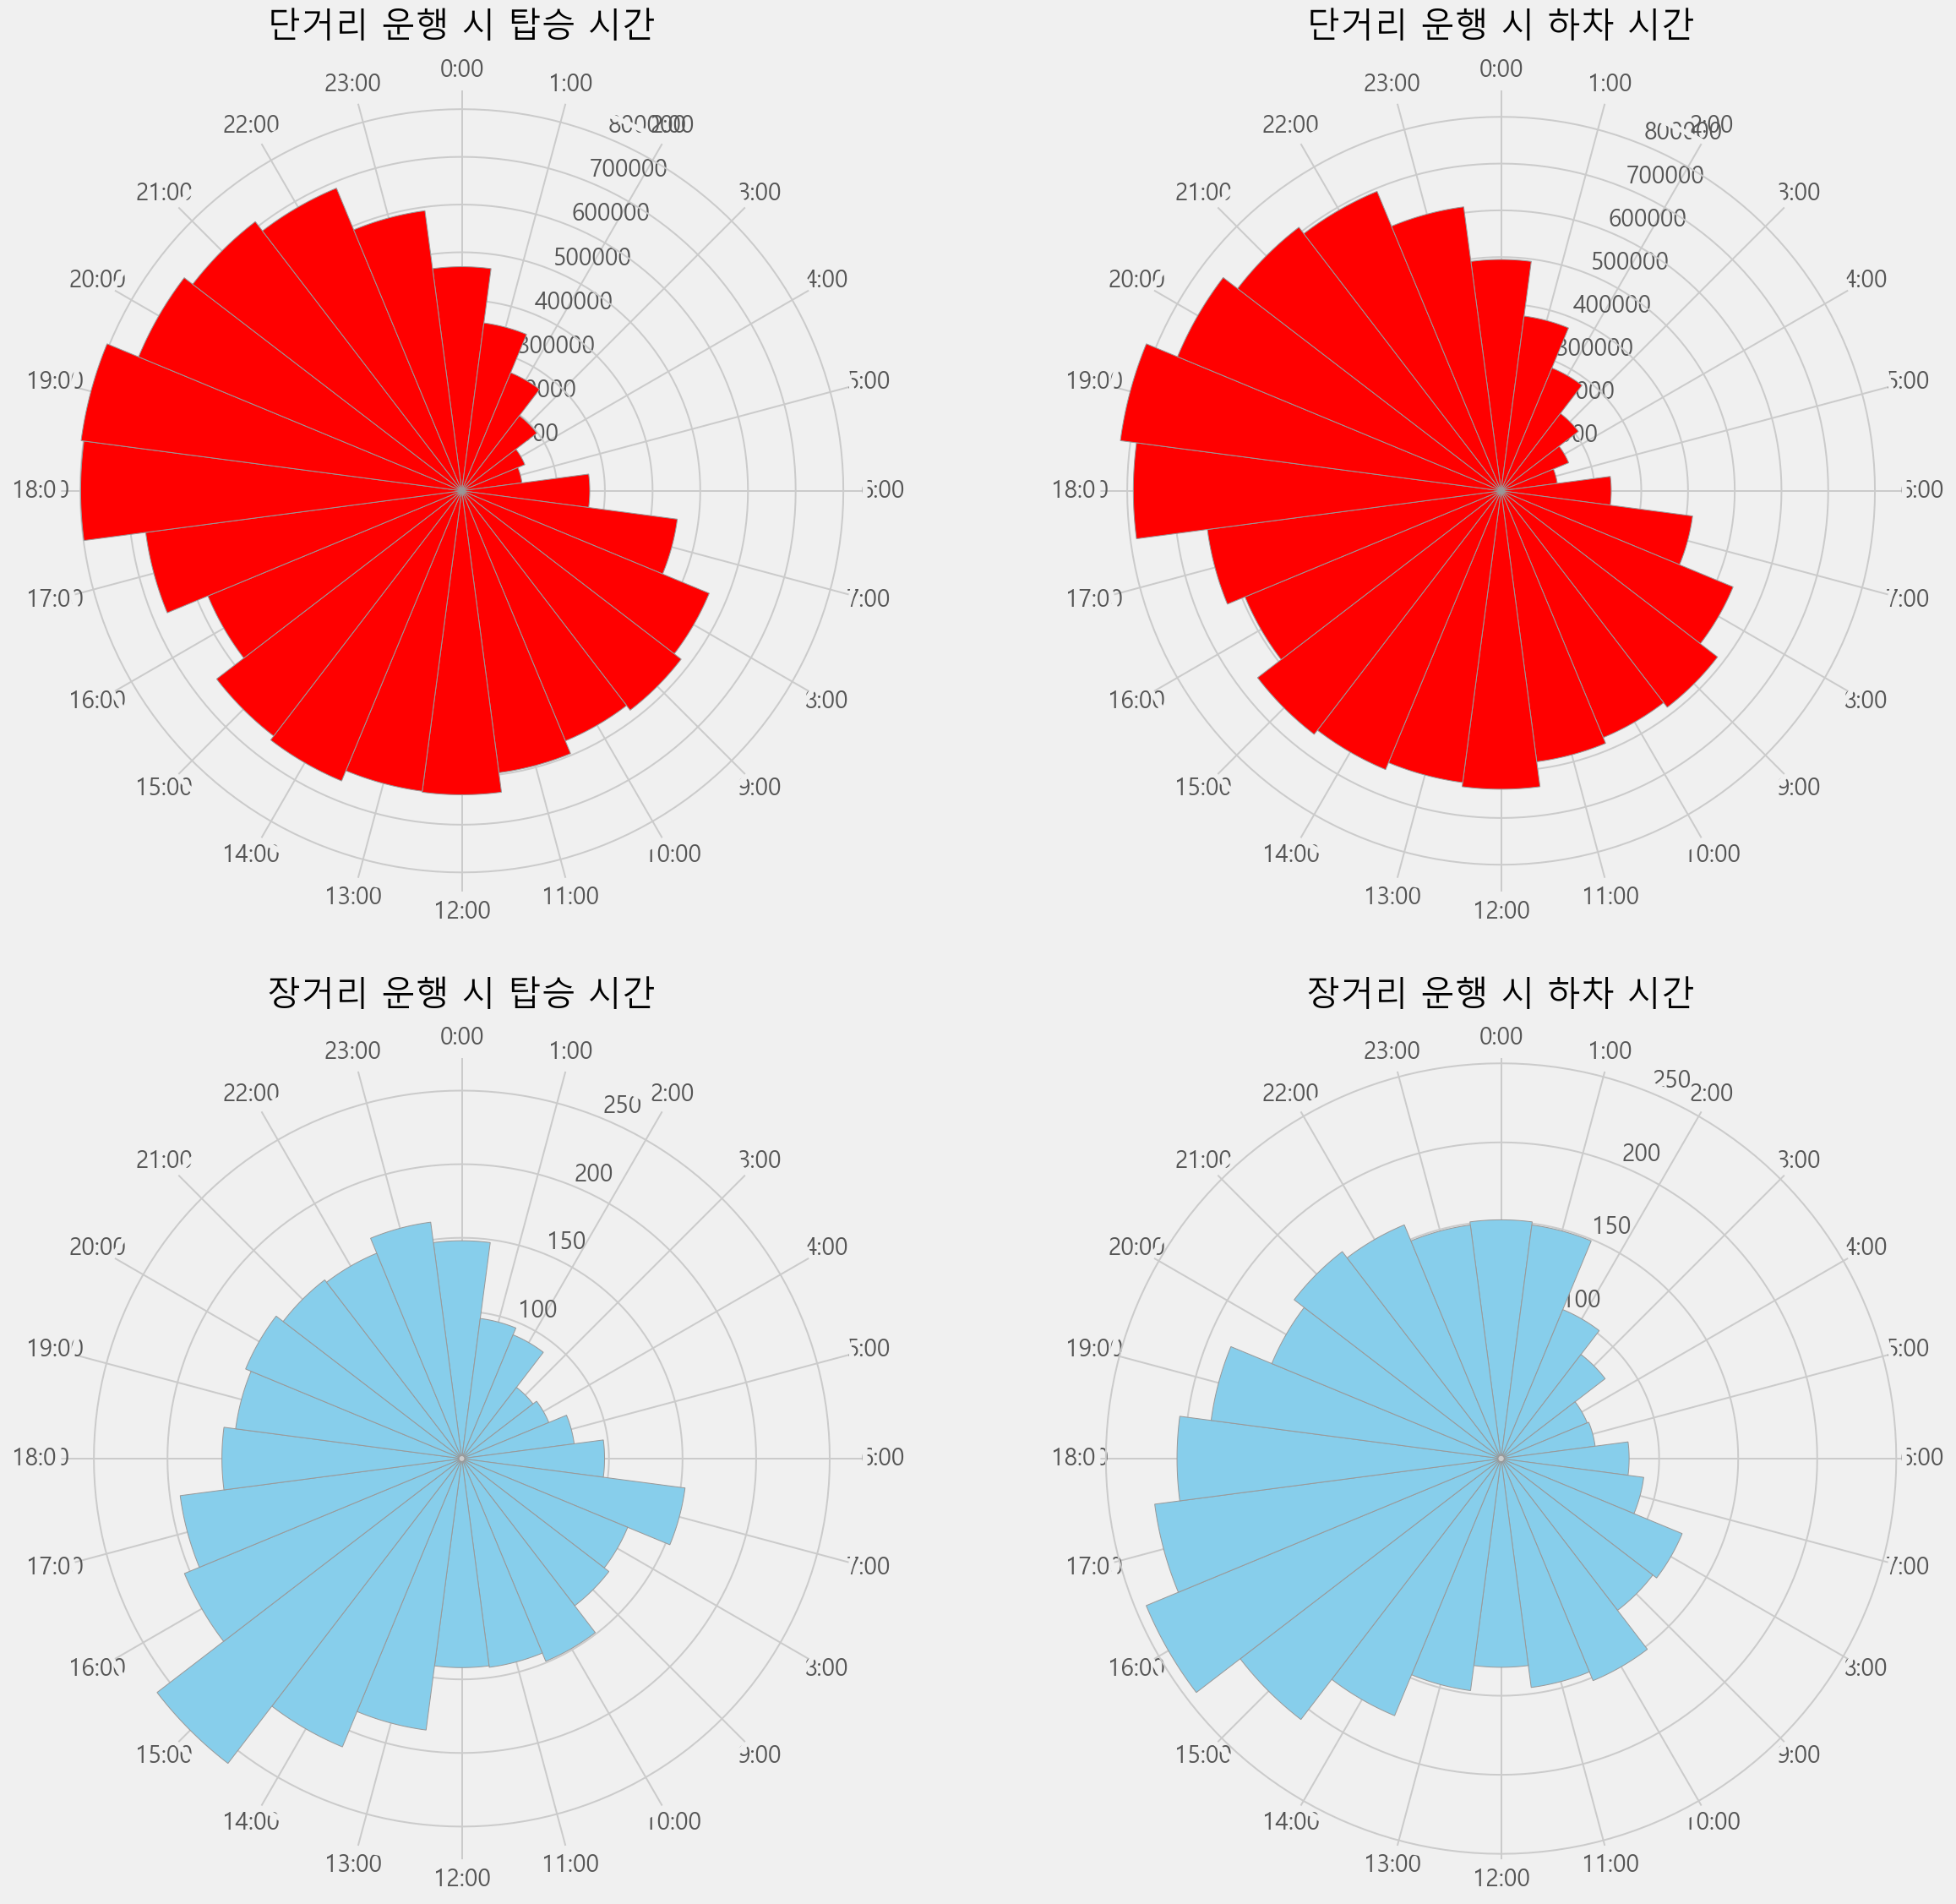

In [171]:
short_long_trip_diff(trip_df_pickup, trip_df_drop_off)